<a href="https://colab.research.google.com/github/Abdourazak01/Projet_Data_Analyse/blob/main/mnist_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Objectif

Créer, entraîner et évaluer un modèle de deep learning (réseau de neurones) pour la classification des chiffres manuscrits du jeu de données MNIST.

✅ Étapes du projet

    Installation des bibliothèques nécessaires

    Chargement de la base de données MNIST

    Prétraitement des données

    Création du modèle

    Compilation du modèle

    Entraînement

    Évaluation

    Prédictions

    Sauvegarde et chargement du modèle (facultatif)

In [1]:
# Étape 1 : Importer les bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Étape 2 : Charger la base MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


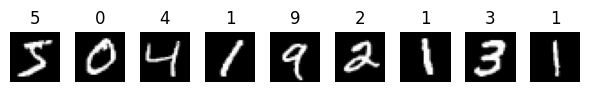

In [5]:
import matplotlib.pyplot as plt

# Créer une grille de 3x3 images
plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.imshow(x_train[i], cmap='gray')       # Affiche l'image en niveaux de gris
    plt.title(f"{y_train[i]}")         # Affiche l'étiquette correspondante
    plt.axis('off')                           # Supprime les axes

plt.tight_layout()
plt.show()


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
# Étape 3 : Normaliser les images (valeurs entre 0 et 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [9]:
# Étape 4 : Encodage one-hot des étiquettes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
# Étape 5 : Création du modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Aplatir l'image 28x28 en un vecteur 784
    Dense(128, activation='relu'),          # Couche cachée avec 128 neurones
    Dense(64, activation='relu'),           # Couche cachée avec 64 neurones
    Dense(10, activation='softmax')         # Couche de sortie avec 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Étape 6 : Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Étape 7 : Entraînement
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8160 - loss: 0.6398 - val_accuracy: 0.9603 - val_loss: 0.1401
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1585 - val_accuracy: 0.9662 - val_loss: 0.1148
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9701 - loss: 0.1043 - val_accuracy: 0.9748 - val_loss: 0.0911
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0764 - val_accuracy: 0.9747 - val_loss: 0.0838
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0572 - val_accuracy: 0.9767 - val_loss: 0.0778
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.9785 - val_loss: 0.0772
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0348 - val_accuracy: 0.9783 - val_loss: 0.0779
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.

In [13]:
# Étape 8 : Évaluation sur le test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0974
Test accuracy: 97.72%


In [14]:
# Étape 9 (optionnelle) : Prédire une image
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
print(f"Prédiction de la première image : {predicted_label}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prédiction de la première image : 7


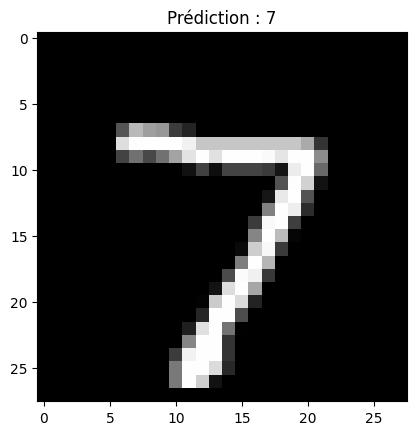

In [15]:
# Visualisation
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Prédiction : {predicted_label}")
plt.show()

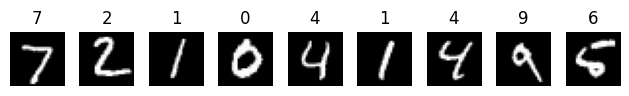

In [24]:
for i in range(9):
    plt.subplot(1, 9, i + 1)
    predicted_label1 = np.argmax(predictions[i])
    #print(f"Prédiction de la première image : {predicted_label1}")

    # Visualisation
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"{predicted_label1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9954 - loss: 0.0165 - val_accuracy: 0.9805 - val_loss: 0.0779
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9956 - loss: 0.0151 - val_accuracy: 0.9785 - val_loss: 0.0853
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9963 - loss: 0.0130 - val_accuracy: 0.9798 - val_loss: 0.0842
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 0.9785 - val_loss: 0.0918
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9978 - loss: 0.0081 - val_accuracy: 0.9768 - val_loss: 0.0930
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9972 - loss: 0.0096 - val_accuracy: 0.9778 - val_loss: 0.1077
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9973 - loss: 0.0090 - val_accuracy: 0.9773 - val_loss: 0.1086
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.

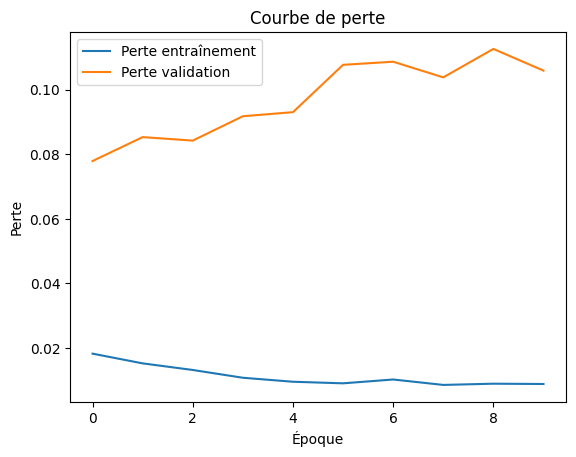

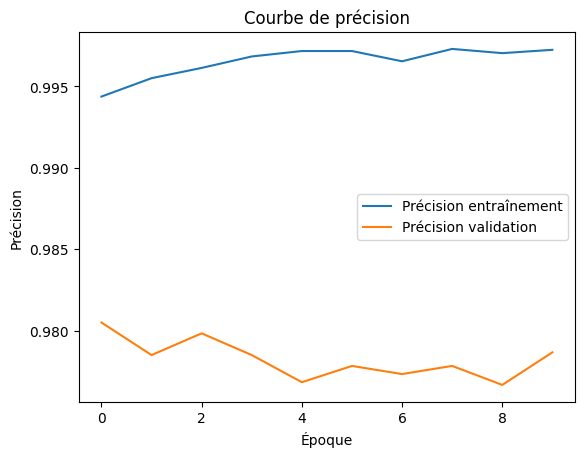

In [25]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Tracer la courbe de perte
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Tracer la courbe de précision
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Courbe de précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()


In [26]:
# Enregistrer le modèle
model.save('mnist_model.h5')

# Télécharger sur le PC
from google.colab import files
files.download('mnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>